### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp 
import seaborn as sns

### **Importing Raw Data**

In [2]:
df=pd.read_csv('C:/Users/tejes/Downloads/blink.csv')

### **Shape of the Data**

In [3]:
print('Shape of the Data :',df.shape)

Shape of the Data : (8523, 12)


### **Data Sample**

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### **Data Info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Total Sales                8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### **Data Cleaning**

In [6]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [7]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})

In [8]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## **Business Requirements**

### **KPI's**

In [9]:
#Total sales
Total_sales=df['Total Sales'].sum()

#Average sales
Average_sales=df['Total Sales'].mean()

#No.of items sold
No_of_items_sold=df['Total Sales'].count()

#Average Rating
Average_rating=df['Rating'].mean()

print(f"Total sales : ${Total_sales:,.0f}")
print(f"Average_sales : ${Average_sales:,.0f}")
print(f"No_of_items_solds : {No_of_items_sold:,.0f}")
print(f"Average_rating : {Average_rating:,.0f}")

Total sales : $1,201,681
Average_sales : $141
No_of_items_solds : 8,523
Average_rating : 4


## **Charting Requirements**

### **Sales by Fat Content**

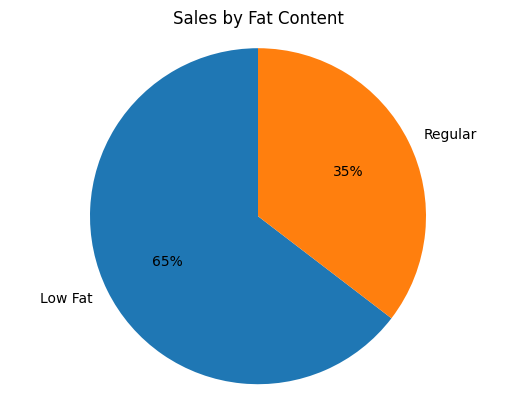

In [10]:
sales_by_fat=df.groupby('Item Fat Content')['Total Sales'].sum()
mp.pie(sales_by_fat, labels = sales_by_fat.index, autopct='%.0f%%', startangle=90)
mp.title('Sales by Fat Content')
mp.axis('equal')
mp.show()

### **Sales by Item Type**

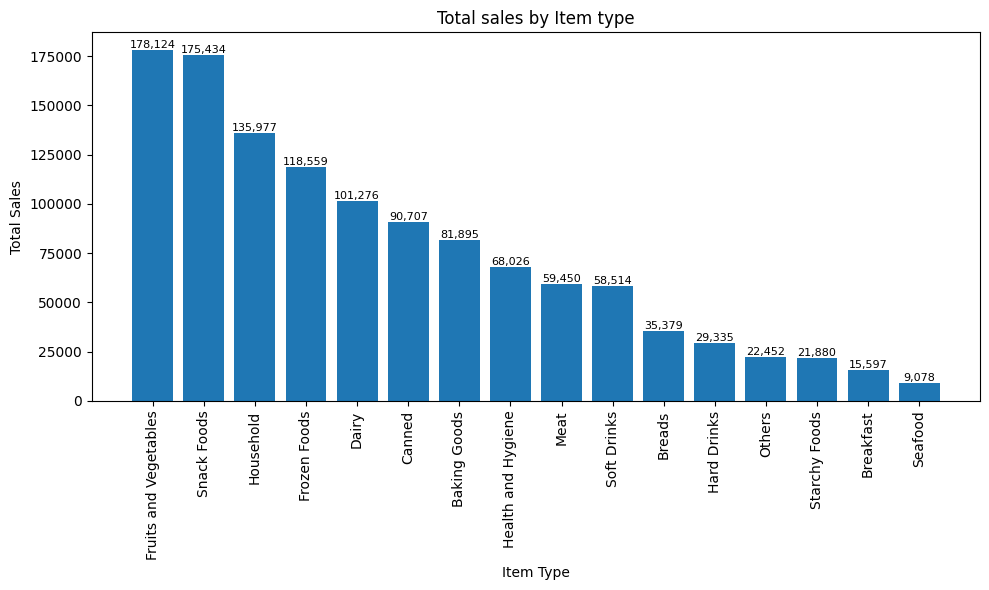

In [11]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

mp.figure(figsize=(10, 6))
bars =mp.bar(sales_by_type.index, sales_by_type.values)

mp.xticks(rotation=90)
mp.xlabel('Item Type')
mp.ylabel('Total Sales')
mp.title('Total sales by Item type')

for bar in bars:
    mp.text(bar.get_x()+ bar.get_width()/2, bar.get_height(),
    f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

mp.tight_layout()
mp.show()

### **Outlet Tier by Item Fat Content**

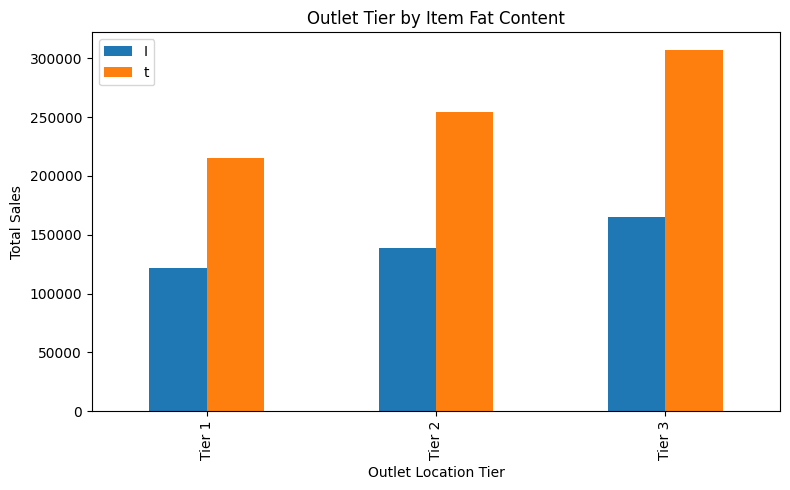

In [12]:
grouped= df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar', figsize=(8,5), title='Outlet Tier by Item Fat Content')
mp.xlabel('Outlet Location Tier')
mp.ylabel('Total Sales')
mp.legend('Item Fat Content')
mp.tight_layout()
mp.show()

### **Outlet Establishment year by Total Sales**

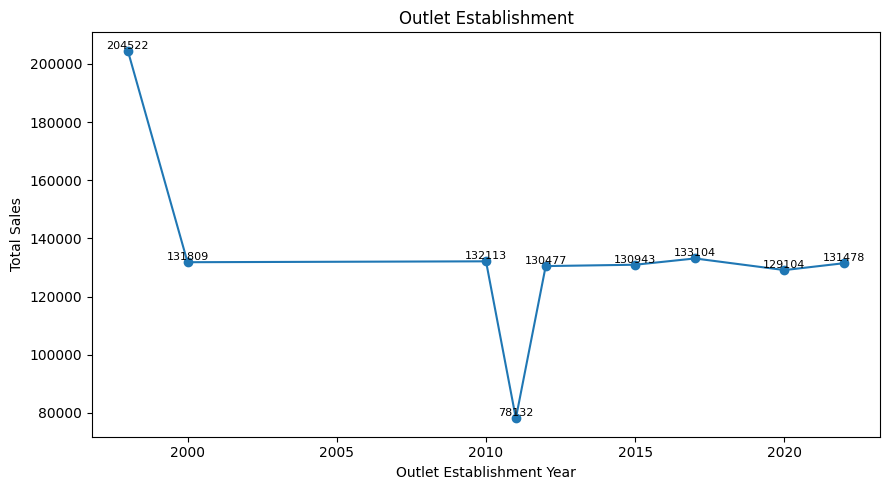

In [13]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

mp.figure(figsize=(9,5))
mp.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

mp.xlabel('Outlet Establishment Year')
mp.ylabel('Total Sales')
mp.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    mp.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

mp.tight_layout()
mp.show()


### **Percentage of outlet size**

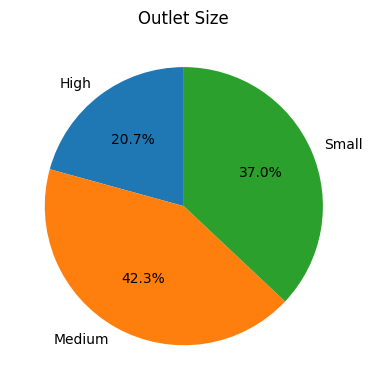

In [14]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()

mp.figure(figsize=(4, 4))
mp.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
mp.title('Outlet Size')
mp.tight_layout()
mp.show()


### **Total Sales by outlet size**

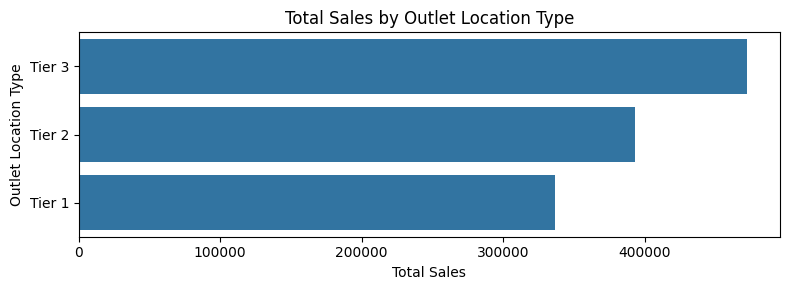

In [15]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales', ascending=False)

mp.figure(figsize=(8, 3))
ax = sns.barplot(x='Total Sales', y='Outlet Location Type', data=sales_by_location)

mp.title('Total Sales by Outlet Location Type')
mp.xlabel('Total Sales')
mp.ylabel('Outlet Location Type')


mp.tight_layout()
mp.show()
